## Stacks batch 1 - data visualization with first pipeline run (no genome)


<br>
I'm mostly interested to see what the read depth v. heterozygosity looks like before we use a reference genome for filtering. 


<br>


In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [3]:
cd ../samplesT92

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92


In [12]:
!python hetVsReadDepth_gzip.py \
-l ../scripts/samples_fqfiles_filtered.txt \
-f ../stacks/batch_1.filteredIndivids.filteredMAF_filteredLoci20p.gen \
-o ../analyses/batch1_HetvReadDepth_filtered_nogenome \
-d 4

KOD03_051 1353028.0 1.0

KOD03_052 3604717.0 1.0

KOD03_054 1783756.0 1.0

KOD03_055 3668576.0 1.0

KOD03_056 1196107.0 1.0

KOD03_057 9225135.0 1.0

KOD03_058 1736725.0 1.0

KOD03_059 1153457.0 1.0

KOD03_061 5100042.0 1.0

KOD03_063 2796354.0 1.0

KOD03_064 8943131.0 1.0

KOD03_065 3613026.0 1.0

KOD03_066 5240244.0 1.0

KOD03_067 6279450.0 1.0

KOD03_068 1158489.0 1.0

KOD03_069 2271243.0 1.0

KOD03_070 1027848.0 1.0

KOD03_071 4874649.0 1.0

KOD03_072 893099.0 1.0

KOD03_073 818087.0 1.0

KOD03_074 2681786.0 1.0

KOD03_075 1064316.0 1.0

KOD03_076 2305672.0 1.0

KOD03_077 1722277.0 1.0

KOD03_078 5446567.0 1.0

KOD03_079 1019426.0 1.0

KOD03_080 938589.0 1.0

KOD03_081 4371260.0 1.0

KOD03_082 3611611.0 1.0

KOD03_083 1744057.0 1.0

KOD03_084 3567750.0 1.0

Traceback (most recent call last):
  File "hetVsReadDepth_gzip.py", line 106, in <module>
    tmp_proportion_het = countHet(sample_name)
  File "hetVsReadDepth_gzip.py", line 70, in countHet
    genotypes_out = genotypes_out.spl



<br>
 Not sure why it's returning heterozygosity so that it's all zero. I used my old read counts and then manually calculated heterozygosity. 
 
 <br>

In [1]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [3]:
myfile = open("hetVreaddepth_nogenome.txt", "r")

count = 0
read_depth = []
prop_het = []


# split each line into read depth and heterozygosity, and save to separate lists
for line in myfile: 
        new_depth = line.strip().split()[1]
        new_het = line.strip().split()[2]
        read_depth.append(new_depth)
        prop_het.append(new_het)
        count += 1

myfile.close()

print "Processed ", count, " samples."

Processed  265  samples.


In [4]:
# convert elements in both lists to strings
length = len(read_depth)
for i in range(0,length):
    read_depth[i] = float(read_depth[i])

length = len(prop_het)
for i in range(0,length):
    prop_het[i] = float(prop_het[i])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

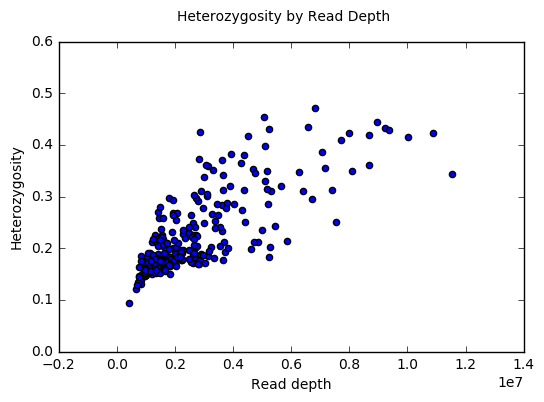

In [6]:
plt.scatter(read_depth, prop_het)
plt.suptitle("Heterozygosity by Read Depth")
plt.xlabel("Read depth")
plt.ylabel("Heterozygosity")
plt.show()

In [7]:
plt.close()

In [8]:
np.corrcoef(read_depth, prop_het)

array([[ 1.        ,  0.77907856],
       [ 0.77907856,  1.        ]])


The correlation coefficient is **0.7791**

<br>
So without the reference genome and second run-through of stacks, there is a slightly higher correlation between read depth and heterozygosity. Visually, it looks like a much stronger linear correlation. 